# HOME-WORK CODE - ADVANCED COMPUTER VISION

### By Beltus Nkwawir Wiysobunri

## Import Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage.util import random_noise


## Read and Display Image

(<Figure size 576x576 with 1 Axes>,
 Text(0.5, 1.0, 'Sunny-Lake Original Image'),
 <matplotlib.image.AxesImage at 0x7f6b88460e80>)

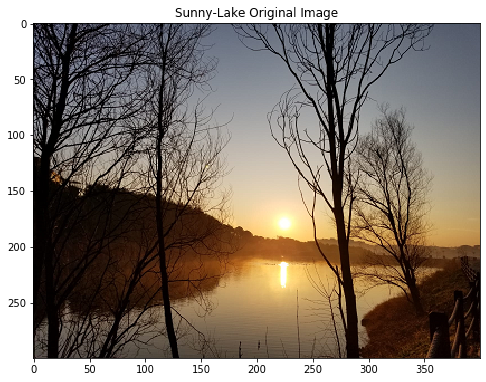

In [2]:
img = cv2.imread('SunnyLake.bmp')

plt.figure(figsize = (8,8)) , plt.title("Sunny-Lake Original Image") , plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))


# Seperate Image into RGB Channels

In [3]:

## seperate different channel
R = img[:, : , 2] #red channel
G = img[:, : , 1] #green channel
B = img[:, :, 0] # blue channel



## Display the RGB Channel Images

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b86bb1630>,
 Text(0.5, 1.0, 'B  - Channel'),
 <matplotlib.image.AxesImage at 0x7f6b86b81cf8>)

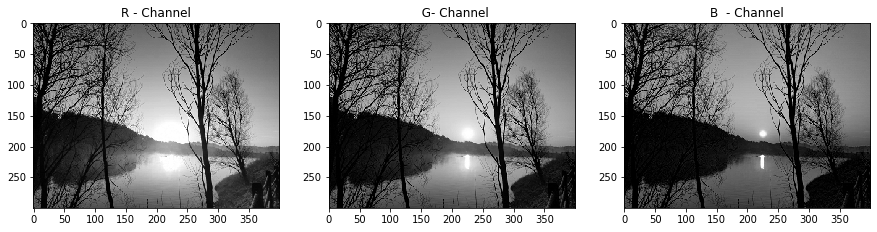

In [4]:
titles = ['R - Channel' ,'  G- Channel' , 'B  - Channel'];

f = plt.figure(); 
f.set_size_inches(15, 15) # Sets the size of the images to be displayed
f.add_subplot(1 , 3 , 1) , plt.title(titles[0]), plt.imshow(R , cmap = "gray")
f.add_subplot(1, 3 , 2),plt.title(titles[1]), plt.imshow(G , cmap = "gray") 
f.add_subplot(1, 3 , 3) , plt.title(titles[2]), plt.imshow(B , cmap = "gray") 


## Convert to Grayscale Image Based on Average across all channels

(<Figure size 576x576 with 1 Axes>,
 Text(0.5, 1.0, 'Grayscale Iamge'),
 <matplotlib.image.AxesImage at 0x7f6b86acceb8>)

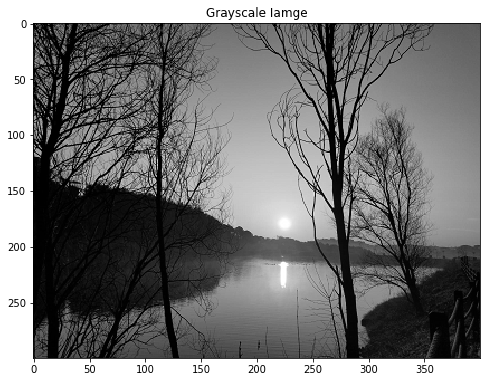

In [5]:
#gray scale method
def grayscale(img):
    
    R = img[:, : , 2]
    G = img[:, : , 1]
    B = img[:, :, 0]
    
    # compute the average across all channels
    gray = R / (np.average(R)) +  G / (np.average(G)) +  B / (np.average(B))

    # scale grayscale values
    gray = (gray * 255) / np.max(gray)

    #alternative method
    #I = np.average(img, -1)
    
    return gray

#convert image to grayscale
gray = grayscale(img);
#display gray image
plt.figure(figsize = (8 , 8)), plt.title("Grayscale Iamge"), plt.imshow(gray , cmap = plt.get_cmap("gray"), interpolation = "nearest")



## Compute Histogram from Grayscale Image



(array([5.788e+03, 2.483e+03, 2.345e+03, 1.438e+03, 1.438e+03, 1.322e+03,
        1.240e+03, 1.175e+03, 1.154e+03, 1.175e+03, 1.084e+03, 1.018e+03,
        9.720e+02, 1.014e+03, 9.430e+02, 9.750e+02, 9.610e+02, 8.490e+02,
        8.280e+02, 7.980e+02, 8.040e+02, 7.160e+02, 7.350e+02, 6.690e+02,
        5.880e+02, 5.440e+02, 5.050e+02, 5.100e+02, 4.550e+02, 4.880e+02,
        4.180e+02, 4.330e+02, 4.590e+02, 4.690e+02, 4.380e+02, 4.710e+02,
        3.920e+02, 4.290e+02, 3.950e+02, 4.140e+02, 4.140e+02, 4.030e+02,
        4.290e+02, 4.330e+02, 3.910e+02, 3.910e+02, 4.480e+02, 3.740e+02,
        4.270e+02, 4.150e+02, 4.220e+02, 4.760e+02, 5.690e+02, 5.880e+02,
        5.330e+02, 5.490e+02, 5.260e+02, 5.330e+02, 5.500e+02, 5.840e+02,
        5.830e+02, 5.560e+02, 5.740e+02, 5.770e+02, 5.960e+02, 5.950e+02,
        5.880e+02, 5.830e+02, 5.680e+02, 5.630e+02, 6.560e+02, 6.660e+02,
        6.940e+02, 7.740e+02, 6.950e+02, 8.000e+02, 6.730e+02, 7.220e+02,
        6.910e+02, 7.120e+02, 7.160e+0

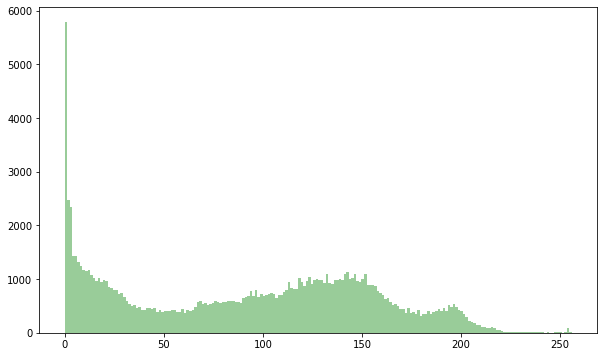

In [6]:
flat_img = gray.flatten()

plt.figure(figsize = (10 , 6))
plt.hist(flat_img, bins = 200 , range = (0, 256) , alpha= 0.4 , color = "g")

## Segment Grayscale Image to Binary Image

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b84b68b38>,
 Text(0.5, 1.0, 'Binary Image'),
 <matplotlib.image.AxesImage at 0x7f6b84b06320>)

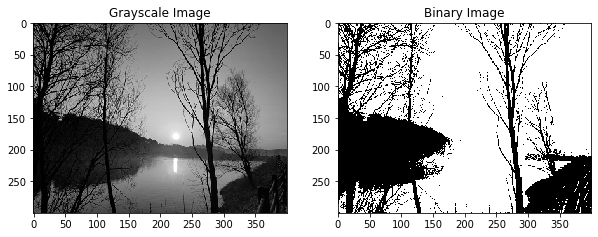

In [7]:

# function for thresholding
def threshold(image , T):

    #binary image.
    binary_image = (image > T) * 1 # set pixel values above threshold to 1
   
    return binary_image


#set threshold value
T = 50

#convert image to binary
binary_image = threshold(gray, T)

#display Thresholded image
f = plt.figure()
f.set_size_inches(10 , 10)
f.add_subplot(1 , 2 , 1) , plt.title('Grayscale Image'),  plt.imshow(gray  , cmap = 'gray')
f.add_subplot(1 , 2 , 2) , plt.title('Binary Image') , plt.imshow( binary_image, cmap = 'gray')
      

## Gaussian Noise Function

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Figure size 576x576 with 1 Axes>,
 Text(0.5, 1.0, 'Gaussian Noisy image'),
 <matplotlib.image.AxesImage at 0x7f6b84a33da0>)

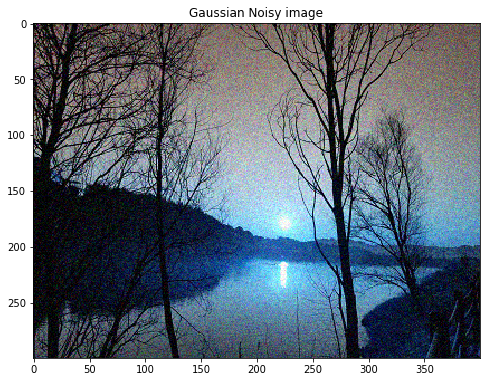

In [8]:
def gaussian_noise(mean, sigma, image):
    
    'Input: image of any dimensions'
    'Return a noisy image '
   
    #noisy_img = np.zeros(image.shape)
    if len(image.shape) == 2:

        row, col = image.shape

        mean = float(mean)
        sigma = float(sigma)

        #generate gaussian noise 
        gauss = np.random.normal(mean , sigma, (row, col)); 
        gauss = np.reshape(gauss, (row, col));

        image = np.asarray(image , np.float64) # convert image to same format as gaussian array before addition else error

        ##add noise to image
        noisy_img = cv2.add(image , gauss)

        
    else:
        
        row, col , chan = image.shape

        mean = float(mean)
        sigma = float(sigma)

        gauss = np.random.normal(mean , sigma, (row, col , chan)); #generate gaussian noise 

        gauss = np.reshape(gauss, (row, col, chan));

        image = np.asarray(image , np.float64) # convert image to same format as gaussian array before addition else error

        ##add noise to image
        noisy_img = cv2.add(image , gauss)

    
    return noisy_img

#display original image with gaussian noise
gaus_img = gaussian_noise(0 , 1 , img);
gaus_img = np.asarray(gaussian_noise(  0 , 20, gaus_img) , np.int64)

plt.figure(figsize = (8,8)), plt.title("Gaussian Noisy image"), plt.imshow(gaus_img)


## Salt and Pepper Noise 

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f6b84a0cda0>)

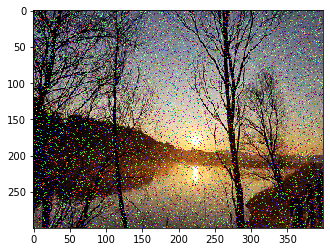

In [9]:
def saltPepper(img):
    
    # Add salt-and-pepper noise to the image.
    noise_img = random_noise(img, mode='s&p',amount=0.1)

    #convert from float to uint8
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    
    return noise_img

# display image

im = saltPepper(img)

plt.figure(), plt.imshow(cv2.cvtColor(im , cv2.COLOR_BGR2RGB))


## Add Gaussian Noise to RGB Channels

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b84973b38>,
 Text(0.5, 1.0, 'Noisy Blue Channel'),
 <matplotlib.image.AxesImage at 0x7f6b84949240>)

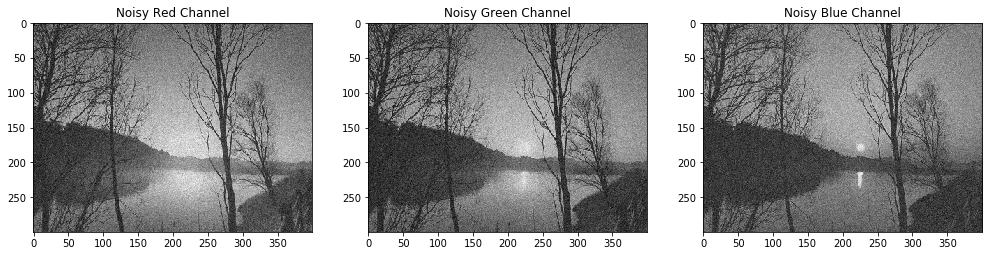

In [10]:


# add noise to R-channel 
R_noise = gaussian_noise(  0 , 20 , R)
# add noise to R-channel 
G_noise = gaussian_noise(  0 , 20 , G)
# add noise to R-channel 
B_noise = gaussian_noise(  0 , 20 , B)


f = plt.figure()
f.set_size_inches(17 , 17)

f.add_subplot(1 , 3 , 1) , plt.title('Noisy Red Channel'),  plt.imshow(R_noise  , cmap = 'gray')
f.add_subplot(1 , 3 , 2) , plt.title('Noisy Green Channel') , plt.imshow(G_noise , cmap = 'gray')
f.add_subplot(1 , 3 , 3) , plt.title('Noisy Blue Channel') , plt.imshow(B_noise , cmap = 'gray')
 

#cv2.imshow("moise" , R_noise)
#cv2.waitKey(0)
#cv2.destroyAllWindows() 

#plt.figure() , plt.imshow(R_noise , cmap = "gray")

## Compute Average Gray Scale Image For RGB Gaussian Noisy Images

In [11]:
#list of std_deviation values for gaussian noise
sigma_list = [1,5,10,20]

gray_noise_list = []

for sigma in  sigma_list:   
    # add noise to R-channel 
    R_noise = gaussian_noise(  0 , sigma , R)
    # add noise to R-channel 
    G_noise = gaussian_noise(  0 , sigma , G)
    # add noise to R-channel 
    B_noise = gaussian_noise(  0 , sigma, B)
    
    # compute the average across all channels
    gray_noise = R / (np.average(R)) +  G / (np.average(G)) +  B / (np.average(B))

    # scale values
    gray_noise = (gray * 255) / np.max(gray)
    
    #append all average gray scale noisy images to list
    gray_noise_list.append(gray_noise)   

### Display all the Averaged Gray scale Noisy Images

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b84852470>,
 Text(0.5, 1.0, 'Standard Deviation = 20'),
 <matplotlib.image.AxesImage at 0x7f6b84822fd0>)

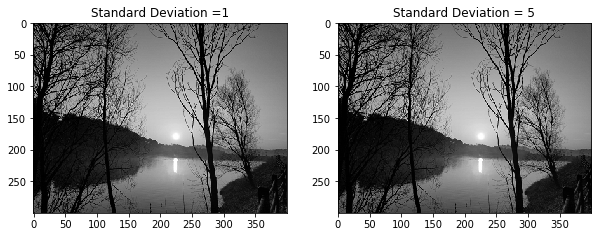

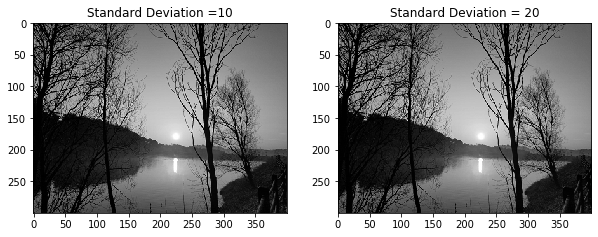

In [12]:
f = plt.figure()
f.set_size_inches(10, 10)
f.add_subplot(1,2, 1) , plt.title("Standard Deviation =" + str(sigma_list[0])), plt.imshow(gray_noise_list[0], cmap = "gray")
f.add_subplot(1,2, 2) , plt.title("Standard Deviation = " + str(sigma_list[1])), plt.imshow(gray_noise_list[1], cmap = "gray")

f1 = plt.figure()
f1.set_size_inches(10, 10)
f1.add_subplot(1,2, 1) , plt.title("Standard Deviation =" + str(sigma_list[2])), plt.imshow(gray_noise_list[2], cmap= "gray")
f1.add_subplot(1,2, 2) , plt.title("Standard Deviation = " + str(sigma_list[3])), plt.imshow(gray_noise_list[3], cmap ="gray")


# Image Filtering

## Low-Pass Filtering with mean-filter

Example of low-pass mean filter kernel
 ![alt text](kernel_min.jpg "Mean Filter")


In [14]:

#kernel size 3x3
kernel3 = np.ones((3 , 3) , np.float32) / 9
#kernel size 5x5
kernel5 = np.ones((5 , 5) , np.float32) / 25

mean3_img_list = []

# applying mean filter of kernel size 3x3 to grayscale image 
mean3_img_list = [cv2.filter2D(gray , -1, kernel3) for gray in gray_noise_list]

# applying mean filter of kernel size 3x3 to grayscale image 
mean5_img_list = [cv2.filter2D(gray , -1, kernel5) for gray in gray_noise_list]


### Displaying the Low Pass Filtered Images Using Mean Filter.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b84622710>,
 Text(0.5, 1.0, 'Filtered Image Kernel 5x5 '),
 <matplotlib.image.AxesImage at 0x7f6b845f72b0>)

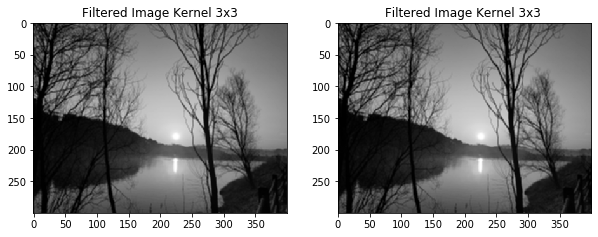

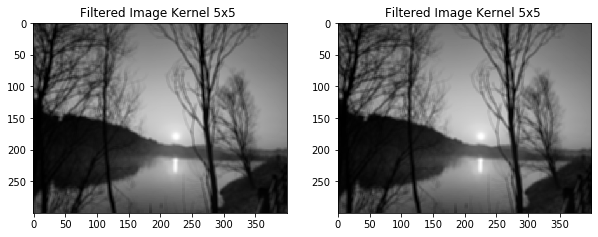

In [15]:
f = plt.figure()
f.set_size_inches(10, 10)
f.add_subplot(1,2, 1) , plt.title("Filtered Image Kernel 3x3"), plt.imshow(mean3_img_list[0], cmap = "gray")
f.add_subplot(1,2, 2) , plt.title("Filtered Image Kernel 3x3 "), plt.imshow(mean3_img_list[3], cmap = "gray")

f1 = plt.figure()
f1.set_size_inches(10, 10)
f1.add_subplot(1,2, 1) , plt.title("Filtered Image Kernel 5x5 "), plt.imshow(mean5_img_list[0], cmap= "gray")
f1.add_subplot(1,2, 2) , plt.title("Filtered Image Kernel 5x5 "), plt.imshow(mean5_img_list[3], cmap ="gray")


## Low Pass Filtering with Gaussian Kernel

![](gaussian_kernelm.jpg "Gaussian kernel")

In [19]:
g_kernel = np.array([[1, 2, 1],[2, 4, 2], [1, 2, 1]]) / 16

# applying mean filter of kernel size 3x3 to grayscale image 
guass_img_list = [cv2.filter2D(gray , -1, g_kernel) for gray in gray_noise_list]



### Displaying the Low Pass Filtered Images Using Gaussian Filter.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b84380630>,
 Text(0.5, 1.0, 'Filtered Image4 Gaussian Kernel'),
 <matplotlib.image.AxesImage at 0x7f6b845a9240>)

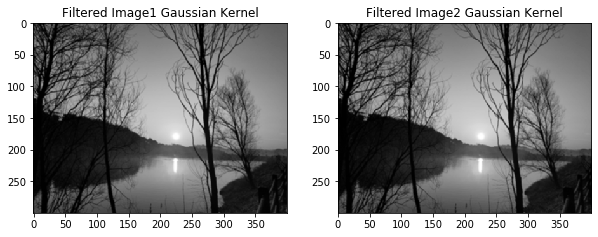

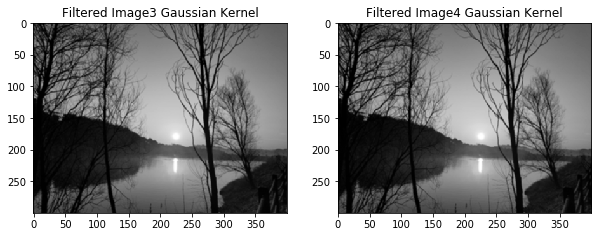

In [20]:
f = plt.figure()
f.set_size_inches(10, 10)
f.add_subplot(1,2, 1) , plt.title("Filtered Image1 Gaussian Kernel"), plt.imshow(guass_img_list[0], cmap = "gray")
f.add_subplot(1,2, 2) , plt.title("Filtered Image2 Gaussian Kernel"), plt.imshow(guass_img_list[1], cmap = "gray")

f1 = plt.figure()
f1.set_size_inches(10, 10)
f1.add_subplot(1,2, 1) , plt.title("Filtered Image3 Gaussian Kernel"), plt.imshow(guass_img_list[2], cmap= "gray")
f1.add_subplot(1,2, 2) , plt.title("Filtered Image4 Gaussian Kernel"), plt.imshow(guass_img_list[3], cmap ="gray")


# High Pass Filtering

## 1- High Pass Filtering using H1 Laplacian Filter

In [21]:
# laplacian kernel
lap_kernel = -1 * np.ones((3, 3) , np.float32)
lap_kernel[1, 1] = 8.0

## applying the laplacian filter
laplacian_img_list = [cv2.filter2D(gray , -1, lap_kernel) for gray in gray_noise_list]



### Displaying the High-Pass Filtered Images Using Laplacian Filter.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b8476b908>,
 Text(0.5, 1.0, 'Filtered Image4 Laplacian Kernel'),
 <matplotlib.image.AxesImage at 0x7f6b844f2710>)

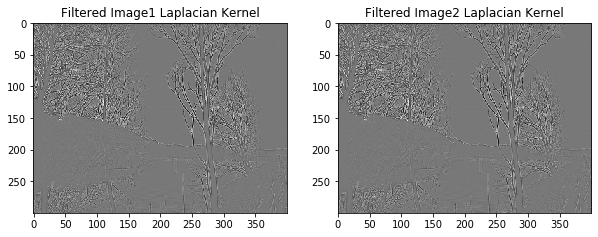

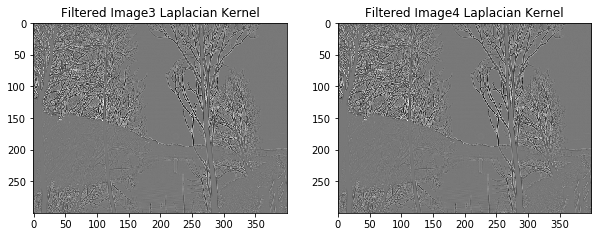

In [22]:

f = plt.figure()
f.set_size_inches(10, 10)
f.add_subplot(1,2, 1) , plt.title("Filtered Image1 Laplacian Kernel"), plt.imshow(laplacian_img_list[0], cmap = "gray")
f.add_subplot(1,2, 2) , plt.title("Filtered Image2 Laplacian Kernel"), plt.imshow(laplacian_img_list[1], cmap = "gray")

f1 = plt.figure()
f1.set_size_inches(10, 10)
f1.add_subplot(1,2, 1) , plt.title("Filtered Image3 Laplacian Kernel"), plt.imshow(laplacian_img_list[2], cmap = "gray")
f1.add_subplot(1,2, 2) , plt.title("Filtered Image4 Laplacian Kernel"), plt.imshow(laplacian_img_list[3], cmap = "gray")


## 2 - High Pass Filtering using H2 Laplacian Filter

In [23]:
# laplacian kernel
lap_kernel2 = np.array([[0.17, 0.67, 0.17],[0.67, -3.33, 0.67], [0.17, 0.67, 0.17]])

## applying the laplacian filter

laplacian_img_list2 = [cv2.filter2D(gray , -1, lap_kernel2) for gray in gray_noise_list]



### Displaying the High-Pass Filtered Images Using H2 Laplacian Filter.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b8424ad68>,
 Text(0.5, 1.0, 'Filtered Image4 Laplacian Kernel'),
 <matplotlib.image.AxesImage at 0x7f6b841a7908>)

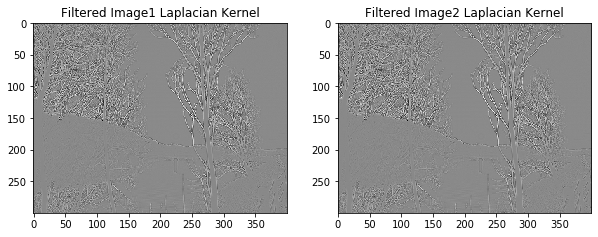

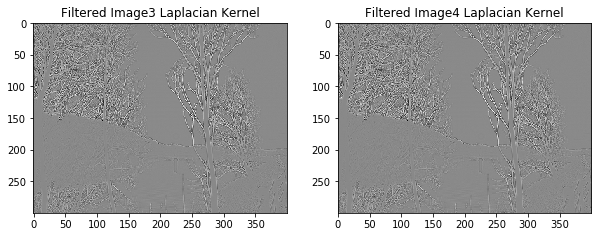

In [24]:
f = plt.figure()
f.set_size_inches(10, 10)
f.add_subplot(1,2, 1) , plt.title("Filtered Image1 Laplacian Kernel"), plt.imshow(laplacian_img_list2[0], cmap = "gray")
f.add_subplot(1,2, 2) , plt.title("Filtered Image2 Laplacian Kernel"), plt.imshow(laplacian_img_list2[1], cmap = "gray")

f1 = plt.figure()
f1.set_size_inches(10, 10)
f1.add_subplot(1,2, 1) , plt.title("Filtered Image3 Laplacian Kernel"), plt.imshow(laplacian_img_list2[2], cmap = "gray")
f1.add_subplot(1,2, 2) , plt.title("Filtered Image4 Laplacian Kernel"), plt.imshow(laplacian_img_list2[3], cmap = "gray")


## - High Pass Filtering using High-Boost Filter

In [25]:
# h2 laplacian kernel

def highBoost(A):
    
    k = 9*A - 1
    kernel = np.array([[-1, -1, -1],[-1, k, -1], [-1, -1, -1]])
    
    return kernel / np.sum(kernel)

A = 1.1

high_boost_kernel = highBoost(A)


## applying the h2laplacian filter

high_boost_list = [cv2.filter2D(gray , -1, high_boost_kernel) for gray in gray_noise_list]

### Displaying the High-Pass Filtered Images Using High-Boost Filter

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6b840d1fd0>,
 Text(0.5, 1.0, 'Filtered Image4 High Boost Kernel'),
 <matplotlib.image.AxesImage at 0x7f6b8402bb70>)

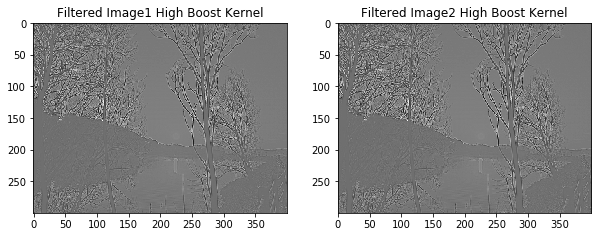

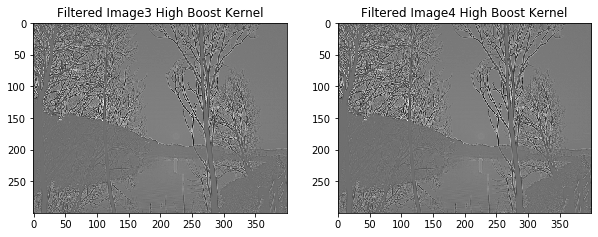

In [26]:
f = plt.figure()
f.set_size_inches(10, 10)
f.add_subplot(1,2, 1) , plt.title("Filtered Image1 High Boost Kernel"), plt.imshow(high_boost_list[0], cmap = "gray")
f.add_subplot(1,2, 2) , plt.title("Filtered Image2 High Boost Kernel"), plt.imshow(high_boost_list[1], cmap = "gray")

f1 = plt.figure()
f1.set_size_inches(10, 10)
f1.add_subplot(1,2, 1) , plt.title("Filtered Image3 High Boost Kernel"), plt.imshow(high_boost_list[2], cmap = "gray")
f1.add_subplot(1,2, 2) , plt.title("Filtered Image4 High Boost Kernel"), plt.imshow(high_boost_list[3], cmap = "gray")


## Comments on Figure 1

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'Salt and Pepper Noise'),
 <matplotlib.image.AxesImage at 0x7f6b77f66a20>)

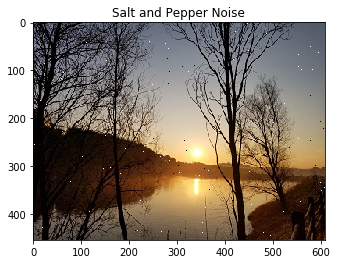

In [27]:
noise_img = cv2.imread("Figure_1.png")

plt.figure(), plt.title("Salt and Pepper Noise"), plt.imshow(cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB))

## De-noising Image with Median Filter

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'De-Noise Image'),
 <matplotlib.image.AxesImage at 0x7f6b77ed0c88>)

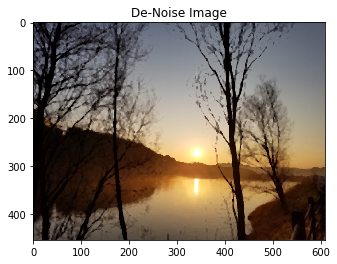

In [28]:
#median Filtering
filtered_img = cv2.medianBlur(noise_img, 5)

plt.figure(), plt.title("De-Noise Image"), plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))

## End of Homework!. 
### Thanks for going through my work to the end Professor.